In [401]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [402]:
df=pd.read_csv('Australian Vehicle Prices.csv')

In [403]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [404]:
df.replace(['POA', '-', '- / -'], np.nan, inplace=True)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16482 non-null  object 
 7   Engine             15059 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16096 non-null  object 
 10  FuelConsumption    15036 non-null  object 
 11  Kilometres         16142 non-null  object 
 12  ColourExtInt       16374 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  15059 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [406]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [407]:
df.shape

(16734, 19)

In [408]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce')


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16482 non-null  object 
 7   Engine             15059 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16096 non-null  object 
 10  FuelConsumption    15036 non-null  object 
 11  Kilometres         16142 non-null  float64
 12  ColourExtInt       16374 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  15059 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [410]:
df.nunique()

,0
Brand,76
Year,45
Model,781
Car/Suv,618
Title,8804
UsedOrNew,3
Transmission,2
Engine,105
DriveType,5
FuelType,8


In [411]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595.0,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16.0,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472.0,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517.0,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035.0,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990.0


In [412]:
df['FuelConsumption'] = df['FuelConsumption'].str.extract(r'(\d+\.\d+)').astype(float)
df['Doors'] = df['Doors'].str.extract(r'(\d+)').fillna(0).astype(int)
df['Seats'] = df['Seats'].str.extract(r'(\d+)').fillna(0).astype(int)
df['CylindersinEngine'] = df['CylindersinEngine'].str.extract(r'(\d+)').fillna(0).astype(int)
df['Engine'] = df['Engine'].str.extract(r'(\d+\.\d+)').astype(float)


In [413]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,2.2,AWD,Diesel,8.7,5595.0,White / Black,"Caringbah, NSW",4,SUV,4,7,51990.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,1.5,Front,Premium,6.7,16.0,Black / Black,"Brookvale, NSW",4,Hatchback,5,5,19990.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,NaN,Rear,Premium,6.6,8472.0,Grey / White,"Sylvania, NSW",4,Coupe,2,4,108988.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,5.5,Rear,Premium,NaN,136517.0,White / Brown,"Mount Druitt, NSW",8,Coupe,2,4,32990.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,1.3,Front,Unleaded,NaN,1035.0,Grey / Black,"Castle Hill, NSW",4,SUV,4,5,34990.0


In [414]:
df.isnull().sum()

,0
Brand,1
Year,1
Model,1
Car/Suv,28
Title,1
UsedOrNew,1
Transmission,252
Engine,7569
DriveType,1
FuelType,638


In [415]:
per_missing_incoulmns=df.isnull().sum()/len(df)
per_missing_incoulmns

,0
Brand,0.000060
Year,0.000060
Model,0.000060
Car/Suv,0.001673
Title,0.000060
UsedOrNew,0.000060
Transmission,0.015059
Engine,0.452313
DriveType,0.000060
FuelType,0.038126


In [416]:
total_num_of_rows=len(df)
total_num_of_rows

16734

In [417]:
# mask=df.isnull().any(axis=1)
# mask

In [418]:
# nam_of_rows_with_nan=mask.sum()
# nam_of_rows_with_nan

In [419]:
# (nam_of_rows_with_nan/total_num_of_rows)*100

In [420]:
# df=df[~mask]
# df

In [421]:
df.isnull().sum()

,0
Brand,1
Year,1
Model,1
Car/Suv,28
Title,1
UsedOrNew,1
Transmission,252
Engine,7569
DriveType,1
FuelType,638


In [422]:
df.duplicated().sum()

0

In [423]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,2.2,AWD,Diesel,8.7,5595.0,White / Black,"Caringbah, NSW",4,SUV,4,7,51990.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,1.5,Front,Premium,6.7,16.0,Black / Black,"Brookvale, NSW",4,Hatchback,5,5,19990.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,NaN,Rear,Premium,6.6,8472.0,Grey / White,"Sylvania, NSW",4,Coupe,2,4,108988.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,5.5,Rear,Premium,NaN,136517.0,White / Brown,"Mount Druitt, NSW",8,Coupe,2,4,32990.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,1.3,Front,Unleaded,NaN,1035.0,Grey / Black,"Castle Hill, NSW",4,SUV,4,5,34990.0


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16482 non-null  object 
 7   Engine             9165 non-null   float64
 8   DriveType          16733 non-null  object 
 9   FuelType           16096 non-null  object 
 10  FuelConsumption    13053 non-null  float64
 11  Kilometres         16142 non-null  float64
 12  ColourExtInt       16374 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16734 non-null  int64  
 15  BodyType           16452 non-null  object 
 16  Doors              167

In [425]:
# Apply unique to each column
unique_values = df.apply(lambda col: col.nunique())
print(unique_values)


Brand                   76
Year                    45
Model                  781
Car/Suv                618
Title                 8804
UsedOrNew                3
Transmission             2
Engine                  58
DriveType                5
FuelType                 8
FuelConsumption        138
Kilometres           14260
ColourExtInt           833
Location               618
CylindersinEngine        9
BodyType                10
Doors                   10
Seats                   14
Price                 3793
dtype: int64


In [426]:
numeric_cols = df.select_dtypes(include=[ 'float32','float64','int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the identified columns
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Year', 'Engine', 'FuelConsumption', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats', 'Price']
Categorical columns: ['Brand', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'ColourExtInt', 'Location', 'BodyType']


In [427]:
for i in  ['UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'BodyType']:
    print(i,df[i].unique())

UsedOrNew ['DEMO' 'USED' 'NEW' nan]
Transmission ['Automatic' 'Manual' nan]
DriveType ['AWD' 'Front' 'Rear' 'Other' '4WD' nan]
FuelType ['Diesel' 'Premium' 'Unleaded' 'Hybrid' nan 'Other' 'Electric' 'LPG'
 'Leaded']
BodyType ['SUV' 'Hatchback' 'Coupe' 'Commercial' nan 'Wagon' 'Ute / Tray' 'Sedan'
 'People Mover' 'Convertible' 'Other']


In [428]:
# Assuming you have a DataFrame 'df' and the output column is named 'target'
correlation = df.select_dtypes(include=[ 'float32','float64','int64']).corr()

# Display correlation values between each column and the output column
correlation_with_target = correlation['Price']

print(correlation_with_target)

Year                 0.353015
Engine               0.448143
FuelConsumption      0.174790
Kilometres          -0.398872
CylindersinEngine    0.166532
Doors               -0.103375
Seats               -0.041157
Price                1.000000
Name: Price, dtype: float64


In [429]:
df['Price_log'] = np.log1p(df['Price'])


In [430]:
df['Price_sqrt'] = np.sqrt(df['Price'])


In [431]:
df['Price_reciprocal'] = 1 / df['Price']


In [432]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['Price_yeojohnson'] = pt.fit_transform(df[['Price']])


In [433]:

df['Price_capped'] = df['Price'].clip(upper=df['Price'].quantile(0.95))


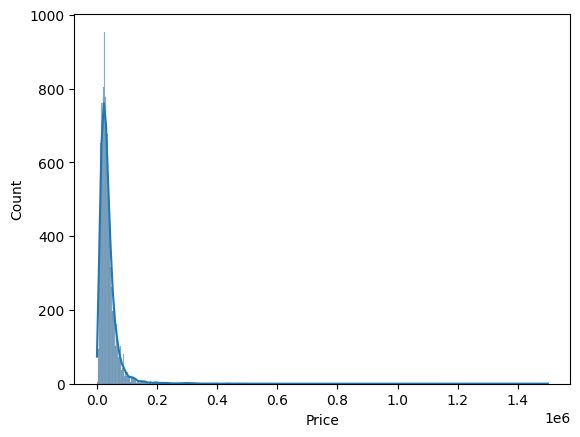

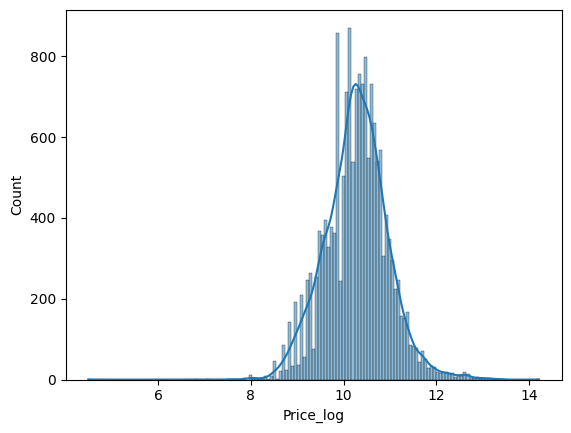

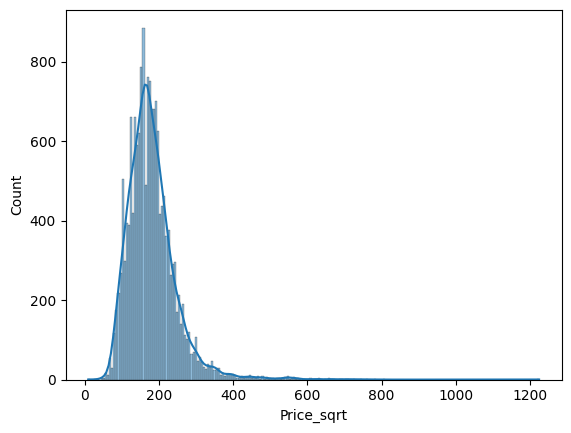

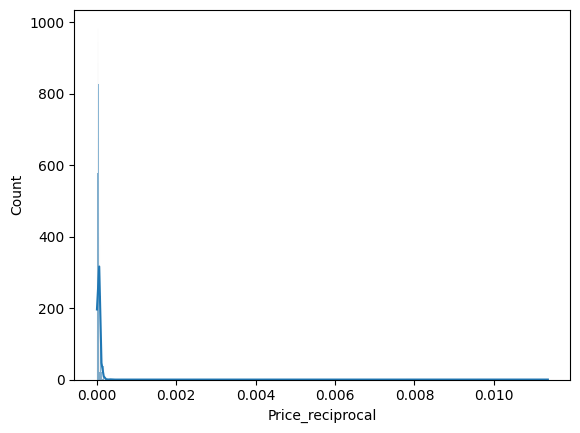

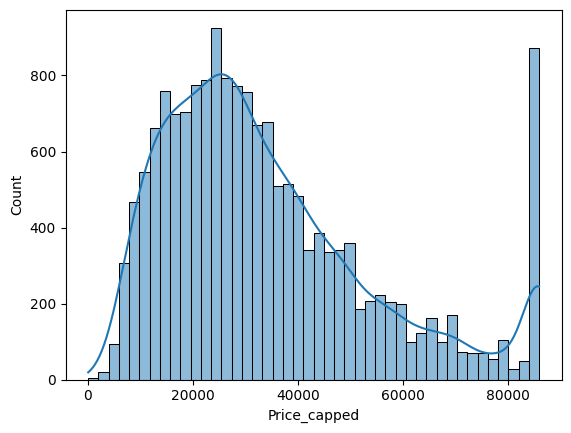

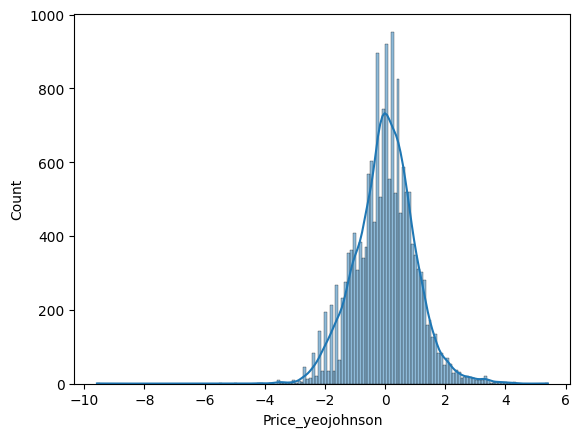

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original Price distribution
sns.histplot(df['Price'], kde=True)
plt.show()

# Log-transformed Price distribution
sns.histplot(df['Price_log'], kde=True)
plt.show()

sns.histplot(df['Price_sqrt'], kde=True)
plt.show()
sns.histplot(df['Price_reciprocal'], kde=True)
plt.show()
sns.histplot(df['Price_capped'], kde=True)
plt.show()
sns.histplot(df['Price_yeojohnson'], kde=True)
plt.show()

In [435]:
df['Price'] = np.expm1(df['Price_log'])


In [436]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price', 'Price_log', 'Price_sqrt',
       'Price_reciprocal', 'Price_yeojohnson', 'Price_capped'],
      dtype='object')

In [437]:
df.drop(columns=['Price_log', 'Price_sqrt',
       'Price_reciprocal', 'Price_yeojohnson', 'Price_capped'],inplace=True)


In [438]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate through object columns and apply label encoding
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Calculate the correlation matrix
correlation = df.corr()

# Display the correlation between encoded categorical columns and the price
correlation_with_price = correlation['Price']

print(correlation_with_price)


Brand               -0.031402
Year                 0.353015
Model                0.028725
Car/Suv             -0.029242
Title                0.420266
UsedOrNew           -0.257958
Transmission        -0.028310
Engine               0.448143
DriveType           -0.035584
FuelType            -0.151127
FuelConsumption      0.174790
Kilometres          -0.398872
ColourExtInt        -0.118653
Location             0.064455
CylindersinEngine    0.166532
BodyType            -0.017368
Doors               -0.103375
Seats               -0.041157
Price                1.000000
Name: Price, dtype: float64


In [439]:
correlation_with_price.sort_values()

,Price
Kilometres,-0.398872
UsedOrNew,-0.257958
FuelType,-0.151127
ColourExtInt,-0.118653
Doors,-0.103375
Seats,-0.041157
DriveType,-0.035584
Brand,-0.031402
Car/Suv,-0.029242
Transmission,-0.028310


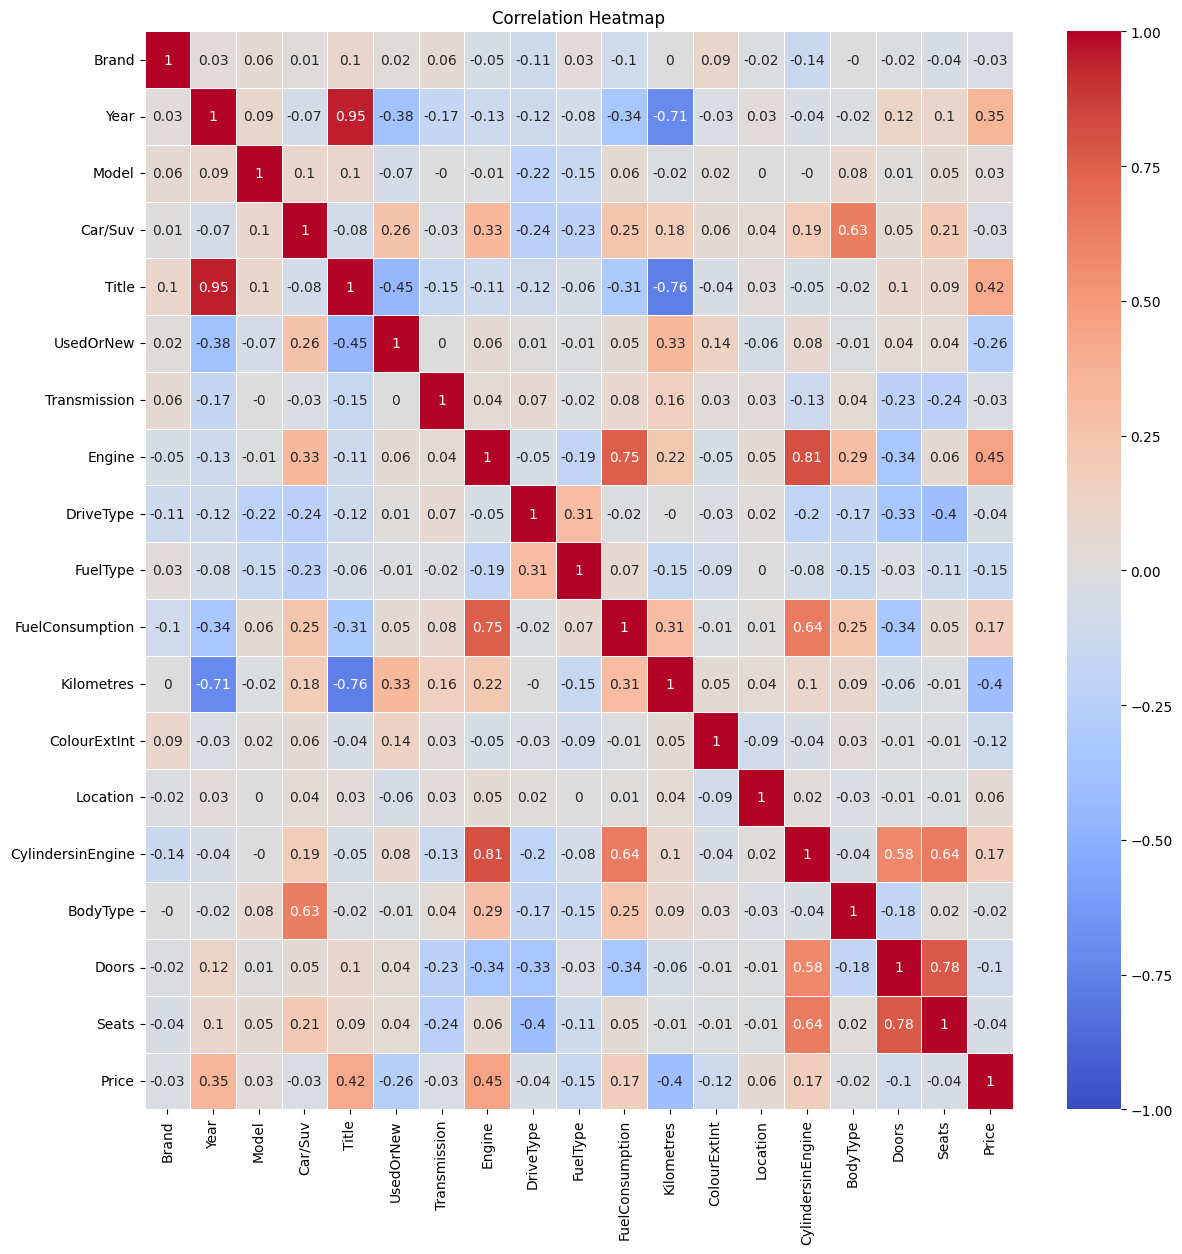

In [440]:
# Compute the correlation matrix
corr_matrix = df.corr().round(2)  # Round correlation values to 2 decimal places

# Set up the matplotlib figure
plt.figure(figsize=(14, 14))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()


In [441]:
### DROP NAN


In [442]:
df.dropna(subset=['Year','Price'], inplace=True)
df[['Kilometres', 'FuelConsumption','Engine']] = df[['Kilometres', 'FuelConsumption','Engine']].fillna(df[['Kilometres', 'FuelConsumption','Engine']].median())

In [443]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [444]:
X = df.drop('Price', axis=1)
y = df['Price']
X.dropna(inplace=True)
y = y[X.index]
X.fillna(X.mean(), inplace=True)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [445]:
y.dropna()# Drop rows with missing values in the target variable 'y'
y = y.dropna()

# Reset index after dropping rows to avoid potential issues
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Now proceed with PCA and model training
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

clf = DecisionTreeClassifier(random_state=42)



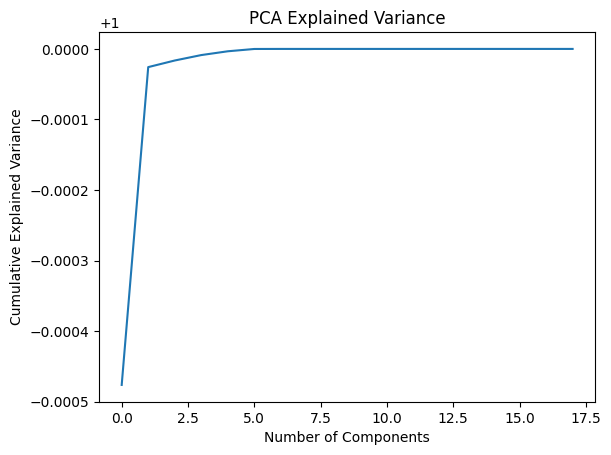

In [446]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your feature matrix
pca = PCA().fit(X)

# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


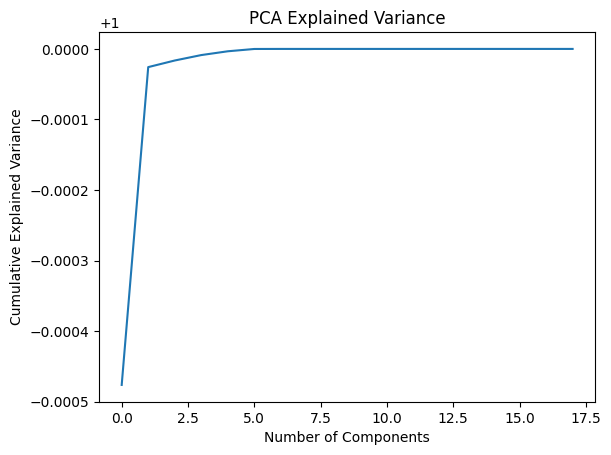

In [447]:

# Plot explained variance to choose the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


In [448]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'pca' is your fitted PCA object
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratios)

# Get the number of components to keep for 90-95% variance
n_components_to_keep = np.argmax(cumulative_variance >= 0.90) + 1


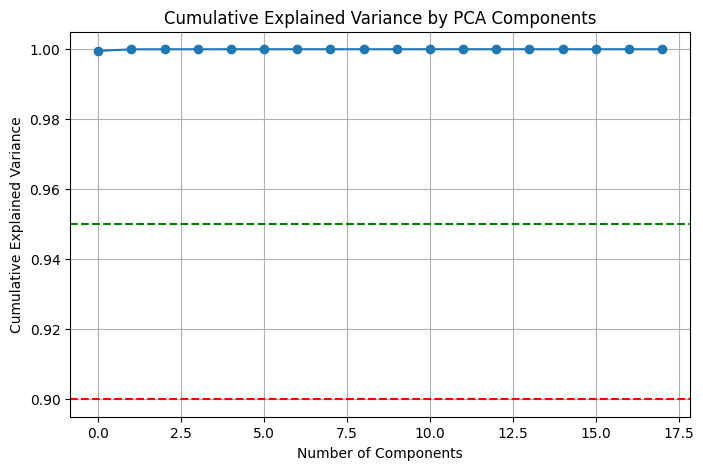

In [449]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')  # 90% line
plt.axhline(y=0.95, color='g', linestyle='--')  # 95% line
plt.grid()
plt.show()


In [450]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)  # Loading scores
feature_importance = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])],
                                   index=X.columns)

# Sort the loading scores for each component to see important features
for i in range(loadings.shape[1]):
    print(f"Principal Component {i + 1}:\n", feature_importance.iloc[:, i].sort_values(ascending=False).head(10))


Principal Component 1:
 Kilometres           76861.147960
Car/Suv                 25.792911
ColourExtInt            14.158989
Location                 4.913049
FuelConsumption          0.448135
BodyType                 0.202747
CylindersinEngine        0.155569
UsedOrNew                0.131993
Engine                   0.104656
Brand                    0.090894
Name: PC1, dtype: float64
Principal Component 2:
 Title           1631.595955
Kilometres        37.180701
Model             29.912184
Location          13.962937
Car/Suv           10.740938
Year               3.392961
Brand              3.178722
ColourExtInt       1.974042
Seats              0.227501
BodyType           0.163757
Name: PC2, dtype: float64
Principal Component 3:
 ColourExtInt    229.809696
Model            30.511273
Car/Suv          11.268339
Brand             1.879093
BodyType          0.111242
UsedOrNew         0.054250
Year              0.052863
Seats             0.004891
Transmission      0.004602
Doors        

In [451]:
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

# ... (your existing code for PCA and data preprocessing) ...
# Instead of trying to access columns using the index of y,
# use the index to select rows
X = X.loc[y.index]
regressor = DecisionTreeRegressor(random_state=42)  # Change to DecisionTreeRegressor
regressor.fit(X_pca, y)

# Get the importance of PCA components
importance = regressor.feature_importances_  # Use regressor instead of clf

# ... (rest of your code for plotting feature importance) ...

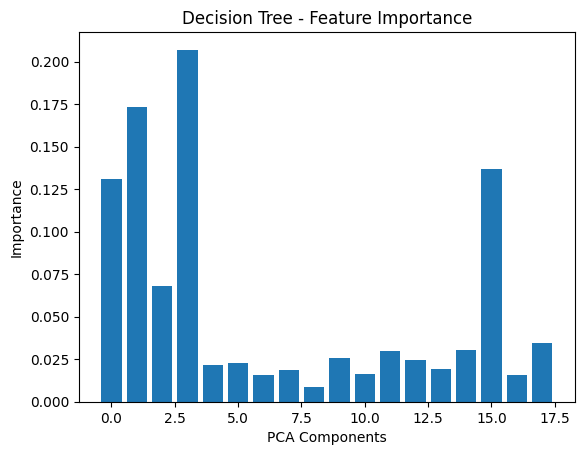

In [452]:

regressor = DecisionTreeRegressor(random_state=42)  # Change to DecisionTreeRegressor
regressor.fit(X_pca, y)

# Get the importance of PCA components
importance = regressor.feature_importances_  # Use regressor instead of clf

# Plot the feature importance of the components
plt.bar(range(len(importance)), importance)
plt.xlabel('PCA Components')
plt.ylabel('Importance')
plt.title('Decision Tree - Feature Importance')
plt.show()


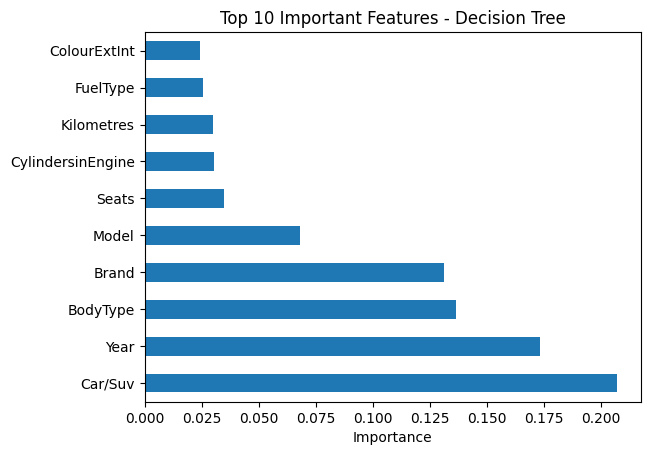

In [453]:


# Get feature importance from original features
feature_importance = pd.Series(regressor.feature_importances_, index=X.columns)

# Plot the feature importance from original features
feature_importance.nlargest(10).plot(kind='barh')
plt.xlabel('Importance')
plt.title('Top 10 Important Features - Decision Tree')
plt.show()


In [454]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [455]:
df.drop(columns=['Title','Transmission','DriveType','FuelType','Doors','Seats'],inplace=True)


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16681 entries, 0 to 16733
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16681 non-null  int64  
 1   Year               16681 non-null  float64
 2   Model              16681 non-null  int64  
 3   Car/Suv            16681 non-null  int64  
 4   UsedOrNew          16681 non-null  int64  
 5   Engine             16681 non-null  float64
 6   FuelConsumption    16681 non-null  float64
 7   Kilometres         16681 non-null  float64
 8   ColourExtInt       16681 non-null  int64  
 9   Location           16681 non-null  int64  
 10  CylindersinEngine  16681 non-null  int64  
 11  BodyType           16681 non-null  int64  
 12  Price              16681 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 2.3 MB


In [457]:
df.isnull().sum()

,0
Brand,0
Year,0
Model,0
Car/Suv,0
UsedOrNew,0
Engine,0
FuelConsumption,0
Kilometres,0
ColourExtInt,0
Location,0


In [458]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Get numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

In [459]:
for i in numerical_cols:
    fig = px.box(df, y=i)
    fig.show()

In [460]:
df['Kilometres']

,Kilometres
0,5595.0
1,16.0
2,8472.0
3,136517.0
4,1035.0
...,...
16729,66000.0
16730,117432.0
16731,5165.0
16732,85525.0


In [461]:
df['Kilometres'].describe()

,Kilometres
count,16681.000000
mean,99801.378874
std,76861.156953
min,1.000000
25%,43003.000000
50%,86114.000000
75%,143989.000000
max,533849.000000


In [462]:
df['Kilometres'].median()

86114.0

In [463]:
df['FuelConsumption']

,FuelConsumption
0,8.7
1,6.7
2,6.6
3,7.6
4,7.6
...,...
16729,7.6
16730,7.6
16731,6.2
16732,7.2


In [464]:
df['FuelConsumption'].describe()

,FuelConsumption
count,16681.000000
mean,7.774582
std,1.725565
min,1.600000
25%,6.900000
50%,7.600000
75%,8.400000
max,20.700000


In [465]:
df['FuelConsumption'].median()

7.6

In [466]:
df[['Kilometres', 'FuelConsumption','Engine']] = df[['Kilometres', 'FuelConsumption','Engine']].fillna(df[['Kilometres', 'FuelConsumption','Engine']].median())

In [467]:
df.isnull().sum()

,0
Brand,0
Year,0
Model,0
Car/Suv,0
UsedOrNew,0
Engine,0
FuelConsumption,0
Kilometres,0
ColourExtInt,0
Location,0


In [468]:
for i in numerical_cols:
    fig = px.box(df, y=i)
    fig.show()

In [469]:
fig1 = px.histogram(df, x="Price", nbins=50, title="Distribution of Car Prices")
fig1.show()

In [470]:
output=df['Price']
input=df.drop(columns=['Price'])

In [471]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(input, output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back into dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_tes = pd.DataFrame(X_test_scaled, columns=X_test.columns)


print('X_train: ',X_train.shape)
print('Y_train: ',y_train.shape)
print('-----------------------------')
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)
print('-----------------------------')
print('X_val: ',y_val.shape)
print('y_val: ',X_val.shape)

X_train:  (8173, 12)
Y_train:  (8173,)
-----------------------------
X_test:  (5005, 12)
y_test:  (5005,)
-----------------------------
X_val:  (3503,)
y_val:  (3503, 12)


# Linear regression model

In [472]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [473]:
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error

def eval_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)
    return r2_train, r2_val

In [474]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
eval_model(linear_reg, X_train, y_train, X_val, y_val)


(0.33678850778831004, 0.33924400444237557)

In [475]:
eval_model(linear_reg, X_train, y_train, X_test, y_test)

(0.33678850778831004, -616062588.1949863)

In [476]:
import math
math.sqrt(0.37154725901417607)

0.6095467652396952

# Polynomial Regression

In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # Sample dataset for illustration (replace with your own dataset)
# X_train = np.random.rand(100, 1) * 6 - 3  # Example: random data between -3 and 3
# y_train = 2 * (X_train ** 2) + np.random.randn(100, 1)  # Quadratic relationship

# Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Fit a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# Create new data for prediction

# Transform new data using the same polynomial features
X_new_poly = poly.transform(X_train)

# Make predictions
y_new = lr.predict(X_new_poly)



In [478]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

-1.594353839745514e+18


# knn

In [484]:
from sklearn.neighbors import KNeighborsRegressor

In [489]:
from sklearn.metrics import mean_squared_error, r2_score # Import necessary functions


In [485]:
modelKNN = KNeighborsRegressor(n_neighbors=2) # Change to KNeighborsRegressor
outKNNacc = modelKNN.fit(X_train, y_train)

In [490]:
y_pred_train = modelKNN.predict(X_train)
y_pred_val = modelKNN.predict(X_val)
print("Training Result (MSE): ", mean_squared_error(y_train, y_pred_train))
print("Training Result (R-squared): ", r2_score(y_train, y_pred_train))
print("Validation Result (MSE): ", mean_squared_error(y_val, y_pred_val))
print("Validation Result (R-squared): ", r2_score(y_val, y_pred_val))

print("Testing Result (MSE): ", mean_squared_error(y_test, modelKNN.predict(X_test)))
print("Testing Result (R-squared): ", r2_score(y_test, modelKNN.predict(X_test)))

Training Result (MSE):  146251765.68925104
Training Result (R-squared):  0.8912569294759123
Validation Result (MSE):  458139533.017342
Validation Result (R-squared):  0.5976833948736279
Testing Result (MSE):  2455295978.461786
Testing Result (R-squared):  -0.5226559262238759


# using cv

In [491]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings(action='ignore')

In [492]:

results = {}

regression_algorithms = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor()
]

for model in regression_algorithms:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X_train, y_train, cv=3)
    results[model_name] = scores

for model_name, scores in results.items():
    print(model_name,"------------------------->", scores, sum(scores)/len(scores))

LinearRegression -------------------------> [0.34805666 0.32438692 0.33019908] 0.33421422226262915
Ridge -------------------------> [0.34805598 0.32438604 0.33020514] 0.33421572000413485
Lasso -------------------------> [0.34805851 0.32438495 0.33020578] 0.3342164090257529
ElasticNet -------------------------> [0.32399361 0.30144335 0.31529388] 0.3135769467263053
DecisionTreeRegressor -------------------------> [0.558045   0.6400099  0.32472338] 0.5075927586300011
RandomForestRegressor -------------------------> [0.76158221 0.73938603 0.68100657] 0.7273249391928537
GradientBoostingRegressor -------------------------> [0.73051845 0.7447301  0.67507095] 0.7167731658323871
SVR -------------------------> [-0.03428159 -0.05685935 -0.05358424] -0.04824172632918892
KNeighborsRegressor -------------------------> [0.60980794 0.61117948 0.57709809] 0.5993618348454192
MLPRegressor -------------------------> [-0.39213569 -0.38329677 -0.4634054 ] -0.41294595547154295
AdaBoostRegressor -------------

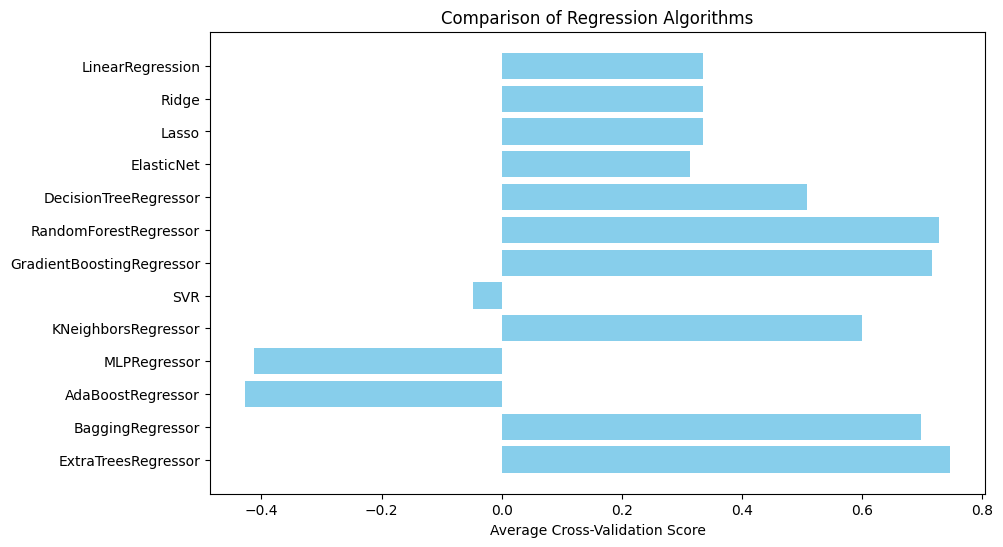

In [493]:
model_names = list(results.keys())
average_scores = [np.mean(scores) for scores in results.values()]

plt.figure(figsize=(10, 6))
plt.barh(model_names, average_scores, color='skyblue')
plt.xlabel('Average Cross-Validation Score')
plt.title('Comparison of Regression Algorithms')
plt.gca().invert_yaxis()
plt.show()

In [494]:
results.values()

dict_values([array([0.34805666, 0.32438692, 0.33019908]), array([0.34805598, 0.32438604, 0.33020514]), array([0.34805851, 0.32438495, 0.33020578]), array([0.32399361, 0.30144335, 0.31529388]), array([0.558045  , 0.6400099 , 0.32472338]), array([0.76158221, 0.73938603, 0.68100657]), array([0.73051845, 0.7447301 , 0.67507095]), array([-0.03428159, -0.05685935, -0.05358424]), array([0.60980794, 0.61117948, 0.57709809]), array([-0.39213569, -0.38329677, -0.4634054 ]), array([-0.83624267, -0.13089393, -0.31369463]), array([0.73735617, 0.70729525, 0.64939865]), array([0.76591113, 0.75479904, 0.71643796])])

In [495]:
average_scores

[0.33421422226262915,
 0.33421572000413485,
 0.3342164090257529,
 0.3135769467263053,
 0.5075927586300011,
 0.7273249391928537,
 0.7167731658323871,
 -0.04824172632918892,
 0.5993618348454192,
 -0.41294595547154295,
 -0.4269437468022574,
 0.6980166870613704,
 0.7457160416810927]

In [496]:
all_scores={}
for model_name, value in results.items():
    all_scores[model_name]= sum(value)/len(value)

In [497]:
best_model_name = max(all_scores, key=all_scores.get)

In [498]:
import pickle

In [499]:
max_score_model = max(all_scores, key=all_scores.get)
max_score_value = all_scores[max_score_model]

print(f"The model with the largest score is '{max_score_model}' with an average score of {max_score_value:.4f}.")

best_model = regression_algorithms[[model.__class__.__name__ for model in regression_algorithms].index(max_score_model)]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

with open(f"{max_score_model}.pkl", 'wb') as file:
    pickle.dump(best_model, file)

print(f"Saved the model as '{max_score_model}.pkl'.")

The model with the largest score is 'ExtraTreesRegressor' with an average score of 0.7457.
Saved the model as 'ExtraTreesRegressor.pkl'.
